<a href="https://colab.research.google.com/github/ShailajaChoudhary/Automatic-license-plate-recognition/blob/main/Automatic_license_plate_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

check cuda present in our system

In [1]:
!nvcc  --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


pytorch install

In [2]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118, https://us-python.pkg.dev/colab-wheels/public/simple/


other libraries

In [3]:
!pip install easyocr
!pip install imutils


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.2/608.2 kB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 19.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.72
    Uninstalling opencv-python-headless-4.7.0.72:
      Successfully uninstalled opencv-python-headless-4.7.0.72
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install opencv-python-headless==4.5.3.56

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.1/37.1 MB 10.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.5.4.60
    Uninstalling opencv-python-headless-4.5.4.60:
      Successfully uninstalled opencv-python-headless-4.5.4.60


import libarries

In [5]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

convert colored image into grayscale format

In [6]:
img = cv2.imread('/content/LICENSE8.png')
print(img)

[[[248 248 248]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[252 252 252]
  [255 255 255]
  [254 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [254 254 254]
  ...
  [250 250 250]
  [251 251 251]
  [251 251 251]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


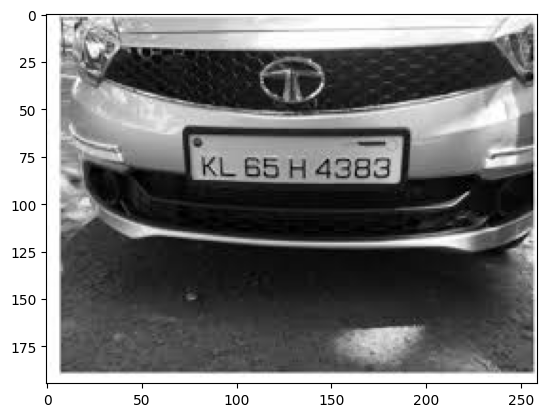

In [7]:
img=cv2.imread('/content/LICENSE8.png') 
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

APPLY FILTER AND EDGE DETECTION

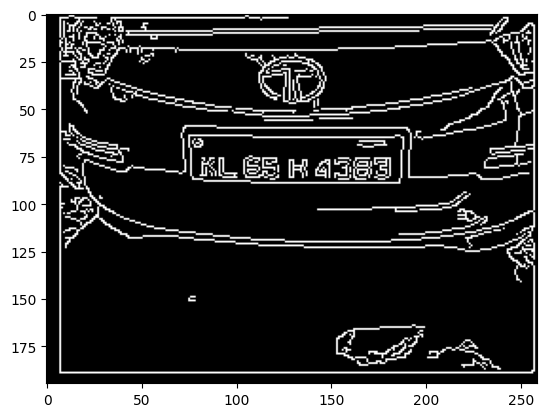

In [8]:
bfilter=cv2.bilateralFilter(gray,11,17,17) #noice reduction
edged=cv2.Canny(bfilter,30,200)# edged detection
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

find contours and apply mask..it takes all polygons and save them in it

In [9]:
keypoints=cv2.findContours(edged.copy(),cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(keypoints)
contours=sorted(contours,key=cv2.contourArea, reverse=True)[:10]

In [10]:
location = None
for contour in contours:
   approx=cv2.approxPolyDP(contour,10,True)
   if len(approx)==4:
      location=approx
      break

In [11]:
location

array([[[ 75,  64]],

       [[ 77,  87]],

       [[187,  86]],

       [[186,  64]]], dtype=int32)

masking

In [12]:
mask=np.zeros(gray.shape,np.uint8) 
new_image=cv2.drawContours(mask,[location],0,255,-1)
new_image=cv2.bitwise_and(img,img,mask=mask)

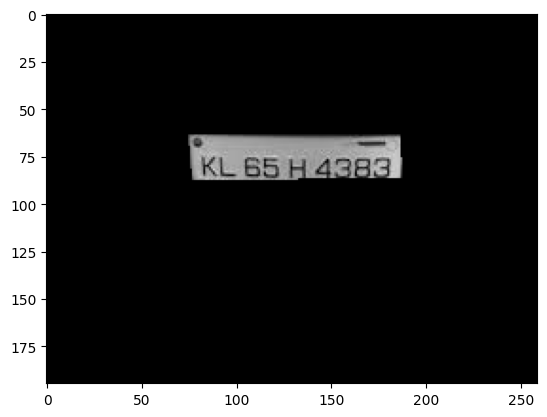

In [13]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

In [14]:
(x,y)=np.where(mask==255)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x),np.max(y))
cropped_image=gray[x1:x2+1,y1:y2+1]

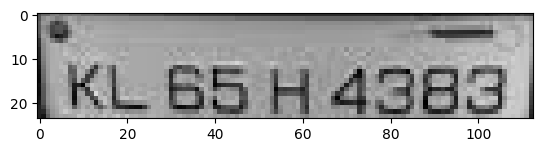

In [15]:
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

use easy ocr to read text

In [16]:
reader=easyocr.Reader(['en'])
result=reader.readtext(cropped_image)
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[3, 7], [111, 7], [111, 24], [3, 24]], 'KL 65 H 4383', 0.7942082030826592)]

plot the result

In [17]:
print(result)
print(result[0][0])

[([[3, 7], [111, 7], [111, 24], [3, 24]], 'KL 65 H 4383', 0.7942082030826592)]
[[3, 7], [111, 7], [111, 24], [3, 24]]


KL 65 H 4383


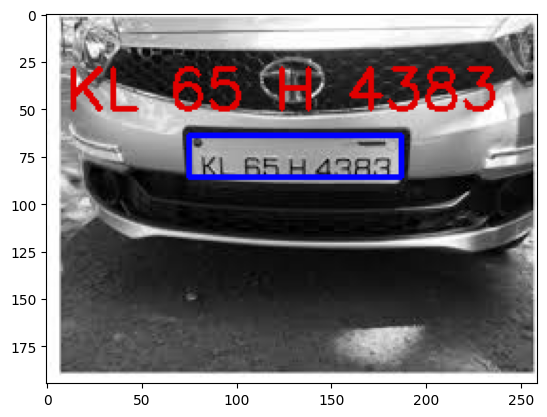

In [18]:
text1=result[0][-2]
font=cv2.FONT_HERSHEY_SIMPLEX
location2=(10,50)
size=1
color=(0,0,225)
res=cv2.putText(img,text1,location2,font,size,color,thickness=2)
res=cv2.rectangle(img,tuple(approx[0][0]),tuple(approx[2][0]),(255,0,0),2)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))
print(text1)